In [1]:
kaggle_url = 'https://www.kaggle.com/c/ghouls-goblins-and-ghosts-boo/data'

In [2]:
# In this notebook I will utilize:
#     Multiclass Logistic Regression
#     K Nearest Neighbor
#     SVM
#     Naive Bayes

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

C:\Users\liamk\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
hworig = pd.read_csv('train.csv',index_col=0)

hworig.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [7]:
hwedit = hworig.copy()

hwedit.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [8]:
def type_class (x):
    if x == 'Ghoul':
        return 0
    elif x == 'Goblin':
        return 1
    elif x == 'Ghost':
        return 2

In [9]:
hwedit['type'] = hwedit['type'].apply(type_class)

hwedit.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,0
1,0.575560,0.425868,0.531401,0.439899,green,1
2,0.467875,0.354330,0.811616,0.791225,black,0
4,0.776652,0.508723,0.636766,0.884464,black,0
5,0.566117,0.875862,0.418594,0.636438,green,2


In [10]:
hw_y = hwedit.pop('type')

hw_y.head()

id
0    0
1    1
2    0
4    0
5    2
Name: type, dtype: int64

In [11]:
hw_y = np.ravel(hw_y)

hw_y[:10]

array([0, 1, 0, 0, 2, 1, 1, 0, 2, 2], dtype=int64)

In [12]:
hwedit.pop('color')

hwedit.head()

,bone_length,rotting_flesh,hair_length,has_soul
id,,,,
0,0.354512,0.350839,0.465761,0.781142
1,0.575560,0.425868,0.531401,0.439899
2,0.467875,0.354330,0.811616,0.791225
4,0.776652,0.508723,0.636766,0.884464
5,0.566117,0.875862,0.418594,0.636438


ML Attempt 01 - Multiclass Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logreg1 = LogisticRegression()

In [15]:
x_train,x_test,y_train,y_test = train_test_split(hwedit,hw_y)

In [16]:
logreg1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
print("Attempt 01 Multiclass 's accuracy is %2.2f%%" % (logreg1.score(x_test,y_test)*100))

Attempt 01 Multiclass 's accuracy is 78.49%


In [18]:
pred_1 = logreg1.predict(x_test)

In [19]:
metrics.accuracy_score(y_test,pred_1) # .score & metrics.accuracy_score yield the same results

0.7849462365591398

ML Attempt 02 - KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=7)

In [22]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [23]:
knn.score(x_test,y_test)

0.6989247311827957

In [24]:
print("Attempt 02 KNN's accuracy is %2.2f%%" % (knn.score(x_test,y_test)*100))

Attempt 02 KNN's accuracy is 69.89%


In [25]:
# to cycle though k to determine best k

k_range = range(1,21)

k_accuracy = []

In [26]:
for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors= k )
    knn.fit(x_train,y_train)
    test_score = knn.score(x_test,y_test)
    
    k_accuracy.append(test_score)

Text(0,0.5,'Testing accuracy')

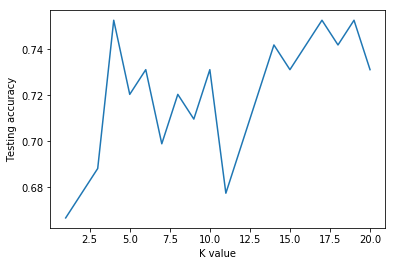

In [27]:
plt.plot(k_range,k_accuracy)
plt.xlabel('K value')
plt.ylabel('Testing accuracy')

In [28]:
# Graph above shows that k = 10 is good for accuracy

ML Attempt 03 - SVM

In [29]:
from sklearn.svm import SVC

In [30]:
svm1 = SVC()

In [31]:
svm1.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
svm1.score(x_test,y_test)

0.7634408602150538

In [33]:
print("Attempt 03 SVM's accuracy is %2.2f%%" % (svm1.score(x_test,y_test)*100))

Attempt 03 SVM's accuracy is 76.34%


In [34]:
# exploring other SVM kernels + visualization
# will use columns hair_length & has_soul

In [35]:
x_train = x_train[['hair_length','has_soul']]

In [36]:
x_test = x_test[['hair_length','has_soul']]

In [37]:
C = 1.0 # regularization

In [38]:
rbf_svc = SVC(kernel='rbf',gamma=0.7,C=C).fit(x_train,y_train) #Radial Bassis Function 

In [39]:
rbf_svc.score(x_test,y_test)

0.6774193548387096

In [40]:
h = 0.02 #step size

x_min = x_train['hair_length'].min() - 0.5
x_max = x_train['hair_length'].max() + 0.5

y_min = x_train['has_soul'].min() - 0.5
y_max = x_train['has_soul'].max() + 0.5

In [41]:
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                     np.arange(y_min,y_max,h))

C:\Users\liamk\Anaconda3\lib\site-packages\matplotlib\contour.py:902: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


([], <a list of 0 Text yticklabel objects>)

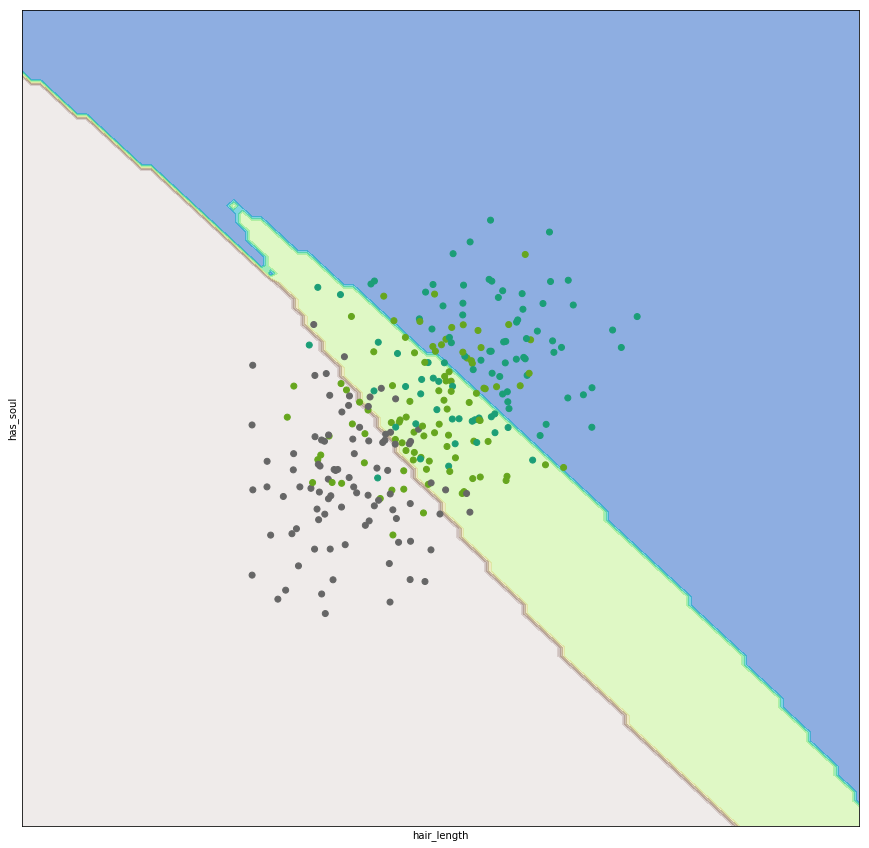

In [42]:
plt.figure(figsize=(15,15))

Z = rbf_svc.predict(np.c_[xx.ravel(),yy.ravel()])
    
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths = 0)
    
plt.scatter(x_train['hair_length'],x_train['has_soul'],c=y_train,cmap=plt.cm.Dark2)

    
plt.xlabel('hair_length')
plt.ylabel('has_soul')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
    
plt.xticks(())
plt.yticks(())

In [43]:
poly_svc = SVC(kernel='poly',degree=3,C=C).fit(x_train,y_train)#3rd degree polynomial

In [44]:
poly_svc.score(x_test,y_test)

0.5698924731182796

C:\Users\liamk\Anaconda3\lib\site-packages\matplotlib\contour.py:902: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


([], <a list of 0 Text yticklabel objects>)

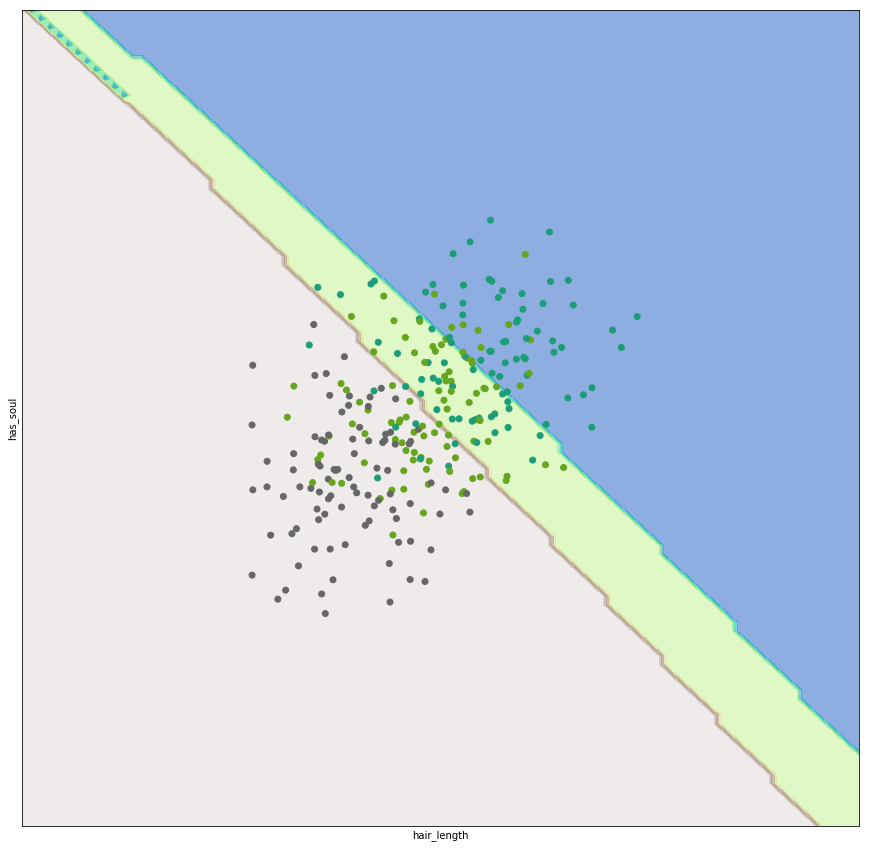

In [45]:
plt.figure(figsize=(15,15))

Z = poly_svc.predict(np.c_[xx.ravel(),yy.ravel()])
    
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths = 0)
    
plt.scatter(x_train['hair_length'],x_train['has_soul'],c=y_train,cmap=plt.cm.Dark2)

    
plt.xlabel('hair_length')
plt.ylabel('has_soul')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
    
plt.xticks(())
plt.yticks(())

ML Attempt 04 - Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

In [46]:
x_train,x_test,y_train,y_test = train_test_split(hwedit,hw_y)

In [48]:
nb = GaussianNB()

In [49]:
nb.fit(x_train,y_train)

GaussianNB(priors=None)

In [50]:
nb.score(x_test,y_test)

0.7419354838709677

In [51]:
print("Attempt 04 Naive Bayes's accuracy is %2.2f%%" % (nb.score(x_test,y_test)*100))

Attempt 04 Naive Bayes's accuracy is 74.19%


In [ ]:
# pt 2 complete!